In [2]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

In [3]:
# Load the dataset
df = pd.read_csv('brain_tumor_dataset.csv')
df.shape

(20000, 19)

In [4]:
# Drop any duplicates
df = df.drop_duplicates()
df.shape

(20000, 19)

In [5]:
# Store relevant columns as variables
X = df[['Tumor_Size', 'Tumor_Growth_Rate']].values
y = df[['Survival_Rate']].values

Text(0, 0.5, 'Survival Rate')

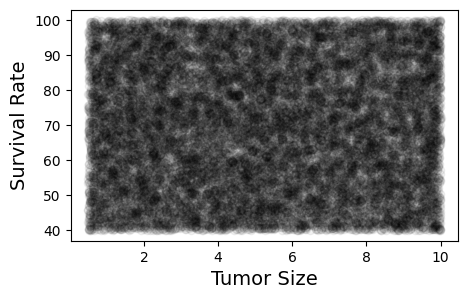

In [6]:
# Tumor Size vs Survival Rate
plt.figure(figsize=(5,3))
plt.scatter(X[:, 0], y, color='black', alpha=0.05)
plt.xlabel('Tumor Size', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

Text(0, 0.5, 'Survival Rate')

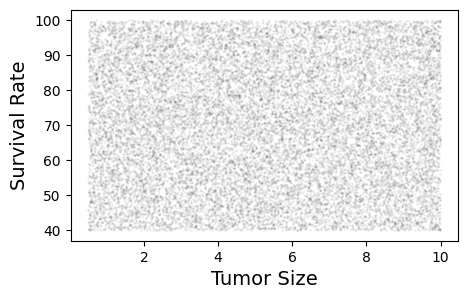

In [7]:
# Tumor Growth Rate vs Survival Rate
plt.figure(figsize=(5,3))
plt.scatter(X[:, 0], y, color='black', alpha=0.05, s=1)
plt.xlabel('Tumor Size', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

Text(0, 0.5, 'Survival Rate')

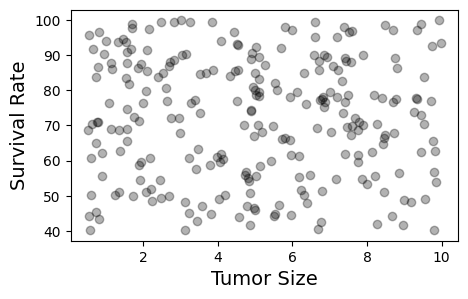

In [8]:
# Tumor Size vs Survival Rate
plt.figure(figsize=(5,3))
sample_indices = np.random.choice(len(X), 250, replace=False)
plt.scatter(X[sample_indices, 0], y[sample_indices], color='black', alpha=0.3)
plt.xlabel('Tumor Size', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

Text(0, 0.5, 'Survival Rate')

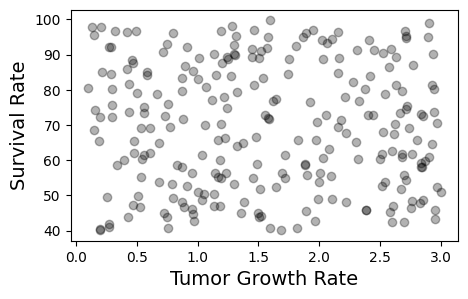

In [9]:
# Graph Tumor Growth Rate vs MPG
plt.figure(figsize=(5,3))
sample_indices = np.random.choice(len(X), 250, replace=False)
plt.scatter(X[sample_indices, 1], y[sample_indices], color='black', alpha=0.3)
plt.xlabel('Tumor Growth Rate', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

In [10]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted Survival Rate = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (Tumor_Size)",
    linModel.coef_[0][1],
    "* (Tumor_Growth_Rate)",
)

Predicted Survival Rate =  70.24121934749306  +  0.020846241236303117 * (Tumor_Size) -0.14129505179988686 * (Tumor_Growth_Rate)


In [11]:
# Make a prediction
yMultyPredicted = linModel.predict([[2.16, .49]])
print(
    "Predicted Survival Rate for a patient with tumor size = 5 and tumor growth rate = 1\n",
    "using the multiple linear regression is ",
    yMultyPredicted[0][0],
    "Survival Rate",
)

Predicted Survival Rate for a patient with tumor size = 5 and tumor growth rate = 1
 using the multiple linear regression is  70.21701265318153 Survival Rate


Predicted Survival Rate =  69.82567591164648  +  0.8135595559428784 * (Tumor_Size)  +  -0.3080324340507505 * (Tumor_Growth_Rate)^2


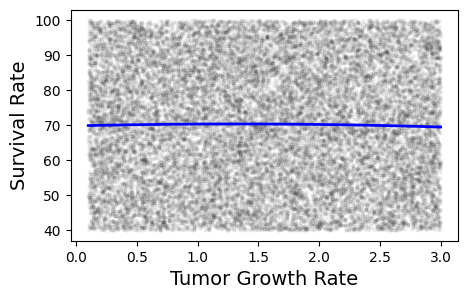

In [15]:
# Store Tumor Growth Rate as an array
X2 = X[:, 1].reshape(-1, 1)
plt.figure(figsize=(5,3))

# Fit a quadratic regression model using just Weight
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X2) # include all observed (weight) and (weight)^2 values
polyModel = LinearRegression() 
polyModel.fit(xPoly, y) # predict the regression poly model predict_y = b0 + b1 * (weight) + b2 * (weight)^2, with our observed (weight) (weight)^2 and MPG values

# Graph the quadratic regression
plt.scatter(X2, y, color='black', alpha=0.05, s=5)
xDelta = np.linspace(X2.min(), X2.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1))) # get the predict MPG for your linspace weight to graph our regression
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Tumor Growth Rate', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

# Write the quadratic model as an equation
print(
    "Predicted Survival Rate = ",
    polyModel.intercept_[0],
    " + ",
    polyModel.coef_[0][0],
    "* (Tumor_Size)",
    " + ",
    polyModel.coef_[0][1],
    "* (Tumor_Growth_Rate)^2",
)